<a href="https://colab.research.google.com/github/Miftahul93/Pengembangan_Machine_Learning_Dicoding/blob/main/Lat_Pengembangan_ML_Penggunaan_Callbacks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Memasang drive ke notebook google colab
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# Melihat daftar dataset di folder dataset ML-Dicoding
!ls "gdrive/MyDrive/Dataset ML-Dicoding"

 ML-iris.zip
'ML-Mall Customer Segmentation Data.zip'
 ML-messy-vs-clean-room.zip
'ML-Pima Indians Diabetes Database.zip'
'ML-Salary data - Simple linear regression.zip'
 ML-Social_Network_Ads.zip
 ML-Submission-rockpaperscissors.zip
'Pengembangan ML'
'Submission_ML_Dicoding_Miftahul Ulum.zip'


In [3]:
# Unzip
import os
import zipfile

local_zip = 'gdrive/MyDrive/Dataset ML-Dicoding/ML-iris.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

In [16]:
# Import library yang dibutuhkan
import tensorflow as tf
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

# Load dataset menjadi dataframe
df = pd.read_csv('Iris.csv')

# Menghapus kolom id
df = df.drop(columns='Id')

#one hot encoding
category = pd.get_dummies(df.Species)
new_df = pd.concat([df, category], axis=1)
new_df = new_df.drop(columns='Species')

# Menentukan label dan target 
dataset = new_df.values
x = dataset[:,0:4]
y = dataset[:,4:7]

# Normalisasi
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(x)

# Bagi dataset 30% untuk test
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, y, test_size=0.3)

# Membuat model
model = Sequential([Dense(64, activation='relu', input_shape=(4,)),
                    Dense(64, activation='relu'),
                    Dense(3, activation='sigmoid'),])

# Menentukan compile
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Selanjutnya kita buat kelas callback. Pada baris pertama lihatlah  bahwa kelas callback kita harus inherit tf.keras.callbacks.Callback. Selanjutnya kita buat fungsi yang paling penting yaitu on_epoch_end(). Fungsi inilah yang akan kita gunakan untuk memberitahu model agar berhenti melakukan pelatihan ketika telah mencapai target.

Selanjutnya kode if(logs.get(‘accuracy’)>0.9) sangat intuitif menunjukkan kalau kode itu memiliki arti “jika akurasi lebih besar dari 0.9 maka eksekusi perintah berikutnya”. Kita juga dapat menulis kode print(“\nAkurasi telah mencapai >90%!”) untuk ditampilkan ketika callback aktif.

Kode self.model.stop_training = True adalah kode yang memberi tahu model untuk menghentikan pelatihan. Setelah kelas ini dibuat kita buat objek dari kelas tersebut.

In [17]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\n Akurasi telah mencapai >90%!")
      self.model.stop_training = True
callbacks = myCallback()

Untuk menggunakan callback sangat gampang, kita hanya perlu menambahkan parameter callback dan mengisi objek callback yang telah kita buat pada parameter tersebut.

In [18]:
# Melatih model menggunakan metode callback
hist = model.fit(X_train, Y_train, epochs=50, callbacks=[callbacks])

Epoch 1/50
4/4 [==============================] - 1s 5ms/step - loss: 1.1154 - accuracy: 0.3357
Epoch 2/50
4/4 [==============================] - 0s 4ms/step - loss: 1.0692 - accuracy: 0.7055
Epoch 3/50
4/4 [==============================] - 0s 5ms/step - loss: 1.0300 - accuracy: 0.6847
Epoch 4/50
4/4 [==============================] - 0s 6ms/step - loss: 0.9941 - accuracy: 0.6653
Epoch 5/50
4/4 [==============================] - 0s 4ms/step - loss: 0.9657 - accuracy: 0.6371
Epoch 6/50
4/4 [==============================] - 0s 6ms/step - loss: 0.9274 - accuracy: 0.6601
Epoch 7/50
4/4 [==============================] - 0s 5ms/step - loss: 0.8879 - accuracy: 0.6944
Epoch 8/50
4/4 [==============================] - 0s 5ms/step - loss: 0.8556 - accuracy: 0.6590
Epoch 9/50
4/4 [==============================] - 0s 5ms/step - loss: 0.8136 - accuracy: 0.7066
Epoch 10/50
4/4 [==============================] - 0s 5ms/step - loss: 0.7872 - accuracy: 0.6743
Epoch 11/50
4/4 [======================

In [13]:
# Import library matplotlib
import matplotlib.pyplot as plt

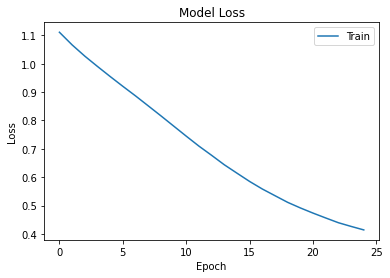

In [19]:
plt.plot(hist.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

<function matplotlib.pyplot.show>

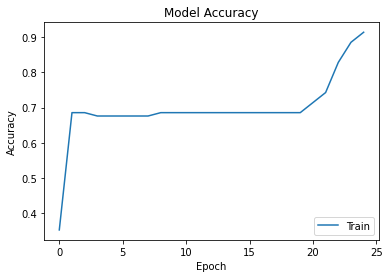

In [20]:
plt.plot(hist.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show